In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.metrics import precision_score,f1_score,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
# Load data
df = pd.read_csv('./data/survey lung cancer.csv')
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [3]:
df.tail()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES
308,M,62,1,1,1,2,1,2,2,2,2,1,1,2,1,YES


In [4]:
# Mappig features
gender_map = {'M':1,'F':0}
target_map = {'YES':1,'NO':0}

df['GENDER'] = df['GENDER'].map(gender_map)
df['LUNG_CANCER'] = df['LUNG_CANCER'].map(target_map)

In [5]:
# Data exploration
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 309 non-null    int64
 1   AGE                    309 non-null    int64
 2   SMOKING                309 non-null    int64
 3   YELLOW_FINGERS         309 non-null    int64
 4   ANXIETY                309 non-null    int64
 5   PEER_PRESSURE          309 non-null    int64
 6   CHRONIC DISEASE        309 non-null    int64
 7   FATIGUE                309 non-null    int64
 8   ALLERGY                309 non-null    int64
 9   WHEEZING               309 non-null    int64
 10  ALCOHOL CONSUMING      309 non-null    int64
 11  COUGHING               309 non-null    int64
 12  SHORTNESS OF BREATH    309 non-null    int64
 13  SWALLOWING DIFFICULTY  309 non-null    int64
 14  CHEST PAIN             309 non-null    int64
 15  LUNG_CANCER            309 non-null    i

In [6]:
df.describe()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,0.524272,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634,0.873786
std,0.500221,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588,0.332629
min,0.000000,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000
75%,1.000000,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
max,1.000000,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


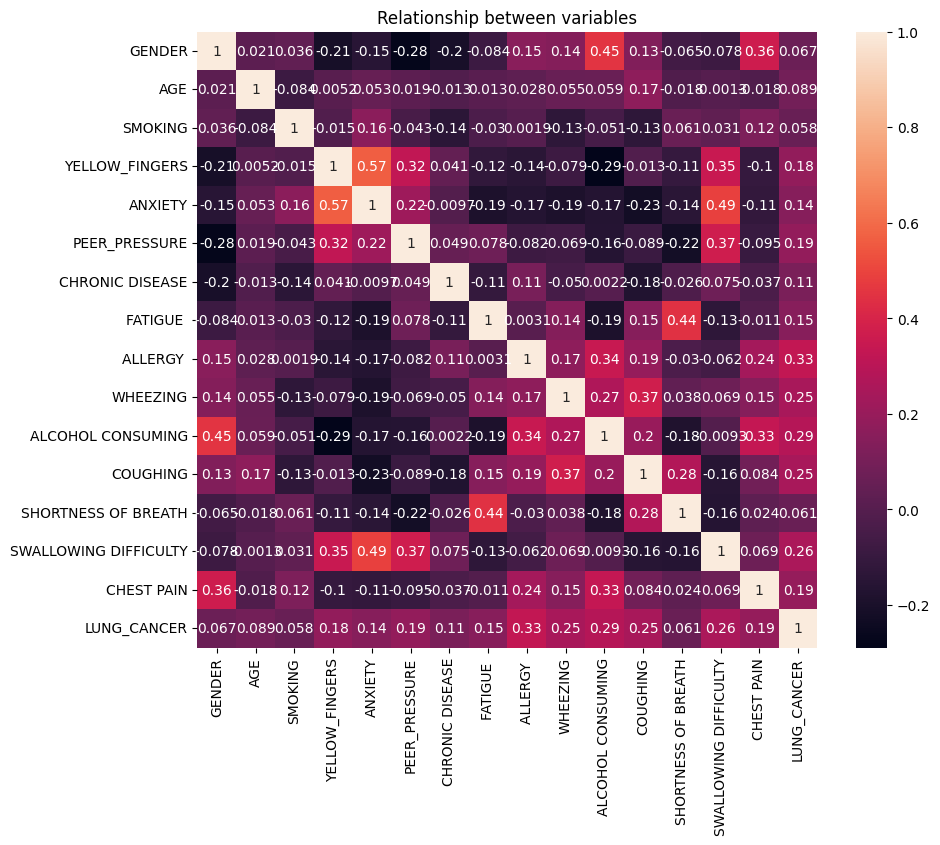

In [7]:
# See the correlation between features and the target
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.title('Relationship between variables')
plt.show()

In [8]:
#### Creating a decision tree ###
from collections import Counter

class Node:
    """Class that represent the tree node"""
    def __init__(self,features=None,thresholds=None,left=None,right=None,value=None):
        self.features = features
        self.thresholds = thresholds
        self.left = left
        self.right = right
        self.value = value

class DecisionTreeClassifier:
    def __init__(self, max_depth=100, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.root = None

    def _calculate_entropy(self, y):
        """Calculate the entropy from a group of labels"""
        counter = np.bincount(y)
        prob = counter / len(y)
        entropy = -np.sum([p * np.log2(p) for p in prob if p > 0])
        return entropy

    def _best_split(self, X, y):
        """Find the best split to increase the gain"""
        best_gain = -1
        best_feature = None
        best_threshold = None

        n_features = X.shape[1]

        for feature in range(n_features):
            thresholds = np.unique(X[:, feature])

            for threshold in thresholds:
                gain = self._information_gain(X, y, feature, threshold)

                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold

    def _grow_tree(self, X, y, depth=0):
        """Build recursively the tree"""
        # Stop Conditions
        n_samples = len(y)
        if (depth >= self.max_depth or 
            n_samples < self.min_samples_split or 
            len(np.unique(y)) == 1):
            
            return self._leaf_node(y)

        feature, threshold = self._best_split(X, y)
        if feature is None:
            return self._leaf_node(y)

        left_idx = X[:, feature] <= threshold
        right_idx = X[:, feature] > threshold

        left = self._grow_tree(X[left_idx], y[left_idx], depth + 1)
        right = self._grow_tree(X[right_idx], y[right_idx], depth + 1)

        return Node(features=feature, thresholds=threshold, left=left, right=right)

    def fit(self, X, y):
        """Train the tree with the data"""
        self.root = self._grow_tree(X, y)

    def _predict_sample(self, x, node):
        """Predict the class of a sample"""
        if node.value is not None:
            return node.value

        if x[node.features] <= node.thresholds:
            return self._predict_sample(x, node.left)
        else:
            return self._predict_sample(x, node.right)

    def predict(self, X):
        """Predict multiple samples"""
        return np.array([self._predict_sample(x, self.root) for x in X])

    def _information_gain(self, X, y, feature, threshold):
        """Calculate information gain for a split"""
        left_idx = X[:, feature] <= threshold
        right_idx = X[:, feature] > threshold

        if np.sum(left_idx) == 0 or np.sum(right_idx) == 0:
            return 0

        parent_entropy = self._calculate_entropy(y)
        left_entropy = self._calculate_entropy(y[left_idx])
        right_entropy = self._calculate_entropy(y[right_idx])

        n_left = len(y[left_idx])
        n_right = len(y[right_idx])
        n_total = len(y)

        gain = parent_entropy - (
            (n_left/n_total)*left_entropy + 
            (n_right/n_total)*right_entropy
        )
        return gain

    def _leaf_node(self, y):
        """Create a leaf node with the most common class"""
        value = Counter(y).most_common(1)[0][0]
        return Node(value=value)
    
    def metrics(self,y_true,y_pred):
        acc = accuracy_score(y_true,y_pred)
        f1 = f1_score(y_true,y_pred)
        precision = precision_score(y_true,y_pred)
        confusion = confusion_matrix(y_true,y_pred)

        print(f'Accuracy: {acc*100:.2f}%')
        print(f'Precision: {precision*100:.2f}%')
        print(f'F1 score: {f1:.4f}')
        print('Confusion Matrix:\n', confusion)

In [9]:
# Data Split
X = df[df.columns[:-1]].values
y = df['LUNG_CANCER'].values

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=.20, random_state=4)

In [10]:
# Fit the model
clf = DecisionTreeClassifier(max_depth=5,min_samples_split=2)
clf.fit(X_train,y_train)

In [11]:
# Make a prediction and avaluation of metrics
pred = clf.predict(X_test)
clf.metrics(y_test,pred)

Accuracy: 90.32%
Precision: 94.64%
F1 score: 0.9464
Confusion Matrix:
 [[ 3  3]
 [ 3 53]]
